# Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

## Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


## Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "recursos", como sexo e classe dos passageiros. Você também pode usar a engenharia de recursos para criar novos recursos.

O conjunto de teste deve ser usado para ver o desempenho do seu modelo em dados não vistos. Para o conjunto de testes, não fornecemos a verdade básica para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic.

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

## Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Dupla:
**Bárbara S. Neves - 388713**
**Lucas Benjamim - 388717**

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Carregando os Dados

In [50]:
trainDF, testDF = pd.read_csv("../../datasets/titanic/train.csv"), pd.read_csv("../../datasets/titanic/test.csv")

## Apresentando os Dados

In [51]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
trainDF.shape, testDF.shape

((891, 12), (418, 11))

In [54]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
trainDF.loc[trainDF['Ticket'] == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [57]:
trainDF = trainDF.drop([179, 271, 302, 597], axis=0)

In [58]:
trainDF.loc[trainDF['Ticket'] == 'LINE'] #Existe um fantasma do Titanic nesse dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Analisando os dados

Podemos perceber que **PassengerId** e **Name**, não são itens úteis para predição. No entanto, precisaremos do ID para fazer a submissão para o dataset de teste.

In [59]:
trainDF.drop(columns=['Name'], inplace=True)
testDF.drop(columns=['Name'], inplace=True)

In [60]:
trainDF.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
testDF.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
trainDF.loc[trainDF['Ticket'] == 'LINE'] # OK

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Na próxima célula, transformaremos **Sex** e **Embarkerd** em binário.

In [63]:
trainDF = pd.get_dummies(trainDF, columns=['Sex', 'Embarked'], drop_first=True) 

In [64]:
trainDF.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,1,0,1


Vemos que acima que a coluna **Ticket** tem duas partes:
  -  Prefixo do ticket: String opcional.
  -  Número do ticket: sempre irá existir. O número nos ajudará a saber quem estava viajando sozinho ou em grupo e qual a proximidade entre as cabines.
  
Logo, iremos subdividir esta string, deixando apenas a parte do número do ticket.

In [65]:
trainDF['NewTicket'] = pd.to_numeric(trainDF['Ticket'].str.replace(' ', '_').str.split('_').str.get(-1))

In [66]:
trainDF.loc[trainDF['Ticket'] == 'LINE'] # OK

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,NewTicket


In [67]:
trainDF.drop(columns=['Ticket'], inplace=True)

Na coluna idade existem existem 177 valores nulos, então, o que deve ser feito? 

In [68]:
trainDF.corr().style.background_gradient(cmap='viridis')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,NewTicket
PassengerId,1,-0.00494787,-0.0336743,0.0356358,-0.0585249,-0.00255128,0.0114582,0.0444416,-0.0342361,0.0233666,-0.022994
Survived,-0.00494787,1,-0.338637,-0.075807,-0.036,0.0812412,0.257248,-0.544165,0.00327577,-0.155329,-0.0963999
Pclass,-0.0336743,-0.338637,1,-0.371676,0.0850264,0.0202515,-0.548447,0.129507,0.222548,0.0796013,0.286279
Age,0.0356358,-0.075807,-0.371676,1,-0.308528,-0.1891,0.0970108,0.0928221,-0.022248,-0.0331427,-0.107166
SibSp,-0.0585249,-0.036,0.0850264,-0.308528,1,0.414244,0.158494,-0.113249,-0.0270314,0.0723653,0.0460179
Parch,-0.00255128,0.0812412,0.0202515,-0.1891,0.414244,1,0.215153,-0.244337,-0.081944,0.0644474,-0.0335292
Fare,0.0114582,0.257248,-0.548447,0.0970108,0.158494,0.215153,1,-0.180568,-0.118253,-0.165091,-0.156916
Sex_male,0.0444416,-0.544165,0.129507,0.0928221,-0.113249,-0.244337,-0.180568,1,-0.0731974,0.123921,0.0773299
Embarked_Q,-0.0342361,0.00327577,0.222548,-0.022248,-0.0270314,-0.081944,-0.118253,-0.0731974,1,-0.4963,-0.00348643
Embarked_S,0.0233666,-0.155329,0.0796013,-0.0331427,0.0723653,0.0644474,-0.165091,0.123921,-0.4963,1,0.173718


Como não existe muita correlação entre os atibutos numéricos e a idade, iremos colocar a média para os valores faltantes.

In [69]:
trainDF['Age'] = trainDF['Age'].replace(np.nan, trainDF['Age'].mode()[0])
trainDF.info() #Como podemos perceber, os valores faltantes de Age foram preenchidos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    887 non-null int64
Survived       887 non-null int64
Pclass         887 non-null int64
Age            887 non-null float64
SibSp          887 non-null int64
Parch          887 non-null int64
Fare           887 non-null float64
Cabin          204 non-null object
Sex_male       887 non-null uint8
Embarked_Q     887 non-null uint8
Embarked_S     887 non-null uint8
NewTicket      887 non-null int64
dtypes: float64(2), int64(6), object(1), uint8(3)
memory usage: 71.9+ KB


Existem poucos valores na coluna **Cabin**, neste caso, como existe menos da metade, iremos dropar a coluna.

In [70]:
trainDF.drop(columns=['Cabin'], inplace=True)
trainDF.info() #Como podemos perceber, a coluna Cabin foi deletada.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    887 non-null int64
Survived       887 non-null int64
Pclass         887 non-null int64
Age            887 non-null float64
SibSp          887 non-null int64
Parch          887 non-null int64
Fare           887 non-null float64
Sex_male       887 non-null uint8
Embarked_Q     887 non-null uint8
Embarked_S     887 non-null uint8
NewTicket      887 non-null int64
dtypes: float64(2), int64(6), uint8(3)
memory usage: 65.0 KB


## Separação dos Dados de Teste

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [72]:
trainDF.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,NewTicket
0,1,0,3,22.0,1,0,7.2500,1,0,1,21171
1,2,1,1,38.0,1,0,71.2833,0,0,0,17599
2,3,1,3,26.0,0,0,7.9250,0,0,1,3101282
3,4,1,1,35.0,1,0,53.1000,0,0,1,113803
4,5,0,3,35.0,0,0,8.0500,1,0,1,373450


In [73]:
X, y = trainDF.values[:, 2:], trainDF.values[:, 1]

In [74]:
X.shape, y.shape

((887, 9), (887,))

In [75]:
X

array([[3.000000e+00, 2.200000e+01, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 2.117100e+04],
       [1.000000e+00, 3.800000e+01, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.759900e+04],
       [3.000000e+00, 2.600000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 3.101282e+06],
       ...,
       [3.000000e+00, 2.400000e+01, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 6.607000e+03],
       [1.000000e+00, 2.600000e+01, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.113690e+05],
       [3.000000e+00, 3.200000e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.703760e+05]])

In [76]:
np.where(X == np.nan)

(array([], dtype=int64), array([], dtype=int64))

In [77]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [78]:
np.where(y == np.nan)

(array([], dtype=int64),)

In [88]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) 
pipe = Pipeline([('transformer', StandardScaler()), ('estimator', DecisionTreeClassifier(random_state=42))])

In [89]:
validacao_cruzada = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
validacao_cruzada 

array([0.77364865, 0.77364865, 0.75932203])

Abaixo, observaremos a Árvore de Decisões, em um simples exemplo sem o pipe criado.

In [90]:
from sklearn.tree import plot_tree

In [100]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

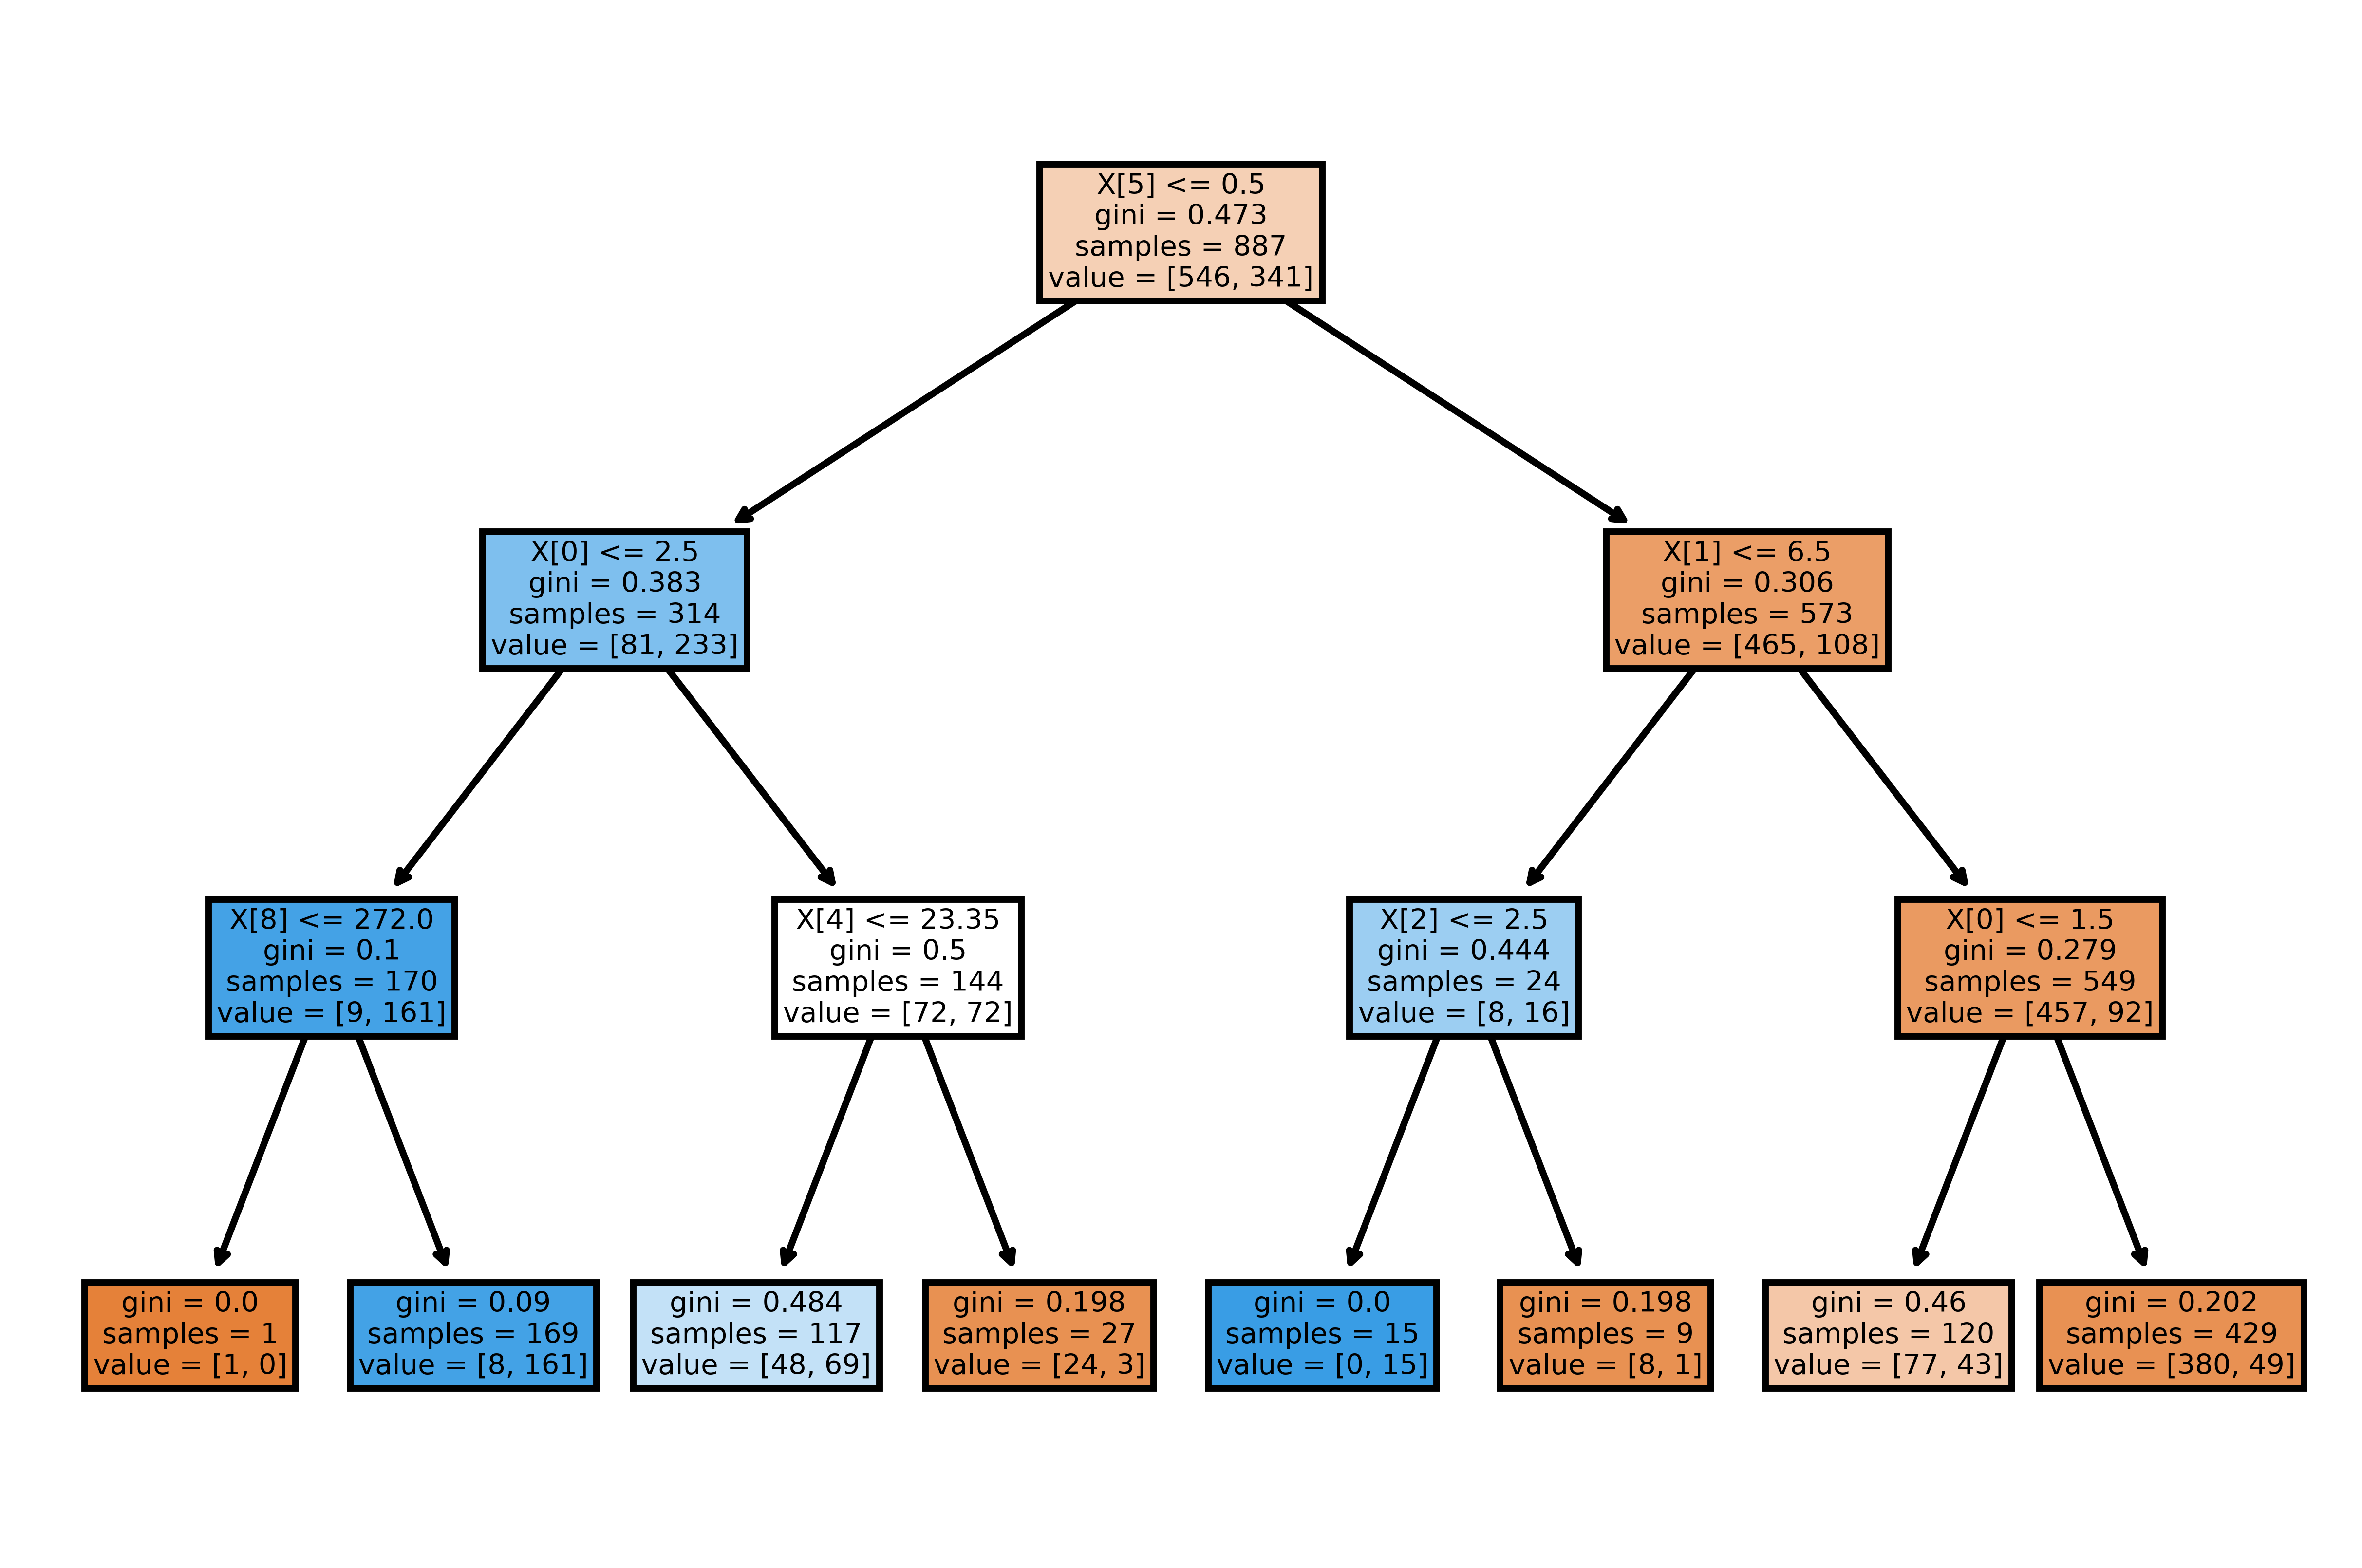

In [104]:
plt.figure(dpi=1000)
plot_tree(model, filled=True);

In [105]:
model.feature_importances_

array([0.21291767, 0.05760845, 0.04470111, 0.        , 0.05054664,
       0.62515174, 0.        , 0.        , 0.00907438])